In [32]:
import pandas as pd

pd.read_csv("wine.csv", header = None)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [72]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv("wine.csv", header=None)
df = df_pre.sample(frac=0.15)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 6245 to 2308
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       975 non-null    float64
 1   1       975 non-null    float64
 2   2       975 non-null    float64
 3   3       975 non-null    float64
 4   4       975 non-null    float64
 5   5       975 non-null    float64
 6   6       975 non-null    float64
 7   7       975 non-null    float64
 8   8       975 non-null    float64
 9   9       975 non-null    float64
 10  10      975 non-null    float64
 11  11      975 non-null    int64  
 12  12      975 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 106.6 KB


In [35]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,7.199282,0.343979,0.315826,5.333128,0.058434,29.940513,113.162051,0.994687,3.219303,0.532615,10.473316,5.800000,0.264615
std,1.225679,0.161031,0.144833,4.811715,0.040195,17.127078,55.815845,0.003052,0.159532,0.156318,1.234354,0.876337,0.441355
min,4.700000,0.080000,0.000000,0.700000,0.009000,3.000000,6.000000,0.987220,2.790000,0.230000,8.400000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,73.500000,0.992245,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.800000,0.047000,28.000000,115.000000,0.995000,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,7.700000,0.068500,41.000000,153.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,14.300000,1.090000,0.990000,31.600000,0.415000,128.000000,289.000000,1.010300,3.780000,1.980000,14.000000,9.000000,1.000000


In [36]:
df.values

array([[ 5.9  ,  0.18 ,  0.28 , ..., 10.65 ,  7.   ,  0.   ],
       [10.2  ,  0.67 ,  0.39 , ..., 10.   ,  5.   ,  1.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  9.4  ,  5.   ,  1.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ..., 11.7  ,  5.   ,  0.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  8.9  ,  5.   ,  0.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  9.2  ,  5.   ,  0.   ]])

In [73]:
X = df.values[:,0:12]
Y = df.values[:, 12]
Y

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [74]:
# 모델 컴파일
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/1500
2/2 [==============================] - 1s 164ms/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 0.0119 - val_accuracy: 0.9938
Epoch 2/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0129 - accuracy: 0.9922 - val_loss: 0.0258 - val_accuracy: 0.9876
Epoch 3/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0177 - val_accuracy: 0.9907
Epoch 4/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0096 - accuracy: 0.9983 - val_loss: 0.0277 - val_accuracy: 0.9876
Epoch 5/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 0.0190 - val_accuracy: 0.9907
Epoch 6/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0100 - accuracy: 0.9949 - val_loss: 0.0397 - val_accuracy: 0.9907
Epoch 7/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0289 - val_accuracy: 0.9907
Epoch 8/1500

Epoch 59/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0103 - accuracy: 0.9949 - val_loss: 0.0323 - val_accuracy: 0.9907
Epoch 60/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.0065 - accuracy: 0.9966 - val_loss: 0.0479 - val_accuracy: 0.9876
Epoch 61/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0383 - val_accuracy: 0.9907
Epoch 62/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0292 - val_accuracy: 0.9876
Epoch 63/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0066 - accuracy: 0.9963 - val_loss: 0.0324 - val_accuracy: 0.9907
Epoch 64/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.0491 - val_accuracy: 0.9845
Epoch 65/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0107 - accuracy: 0.9983 - val_loss: 0.0392 - val_accuracy: 0.9907
Epoch 

2/2 [==============================] - 0s 34ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.0574 - val_accuracy: 0.9814
Epoch 117/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0312 - accuracy: 0.9865 - val_loss: 0.0460 - val_accuracy: 0.9876
Epoch 118/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0125 - accuracy: 0.9949 - val_loss: 0.0560 - val_accuracy: 0.9876
Epoch 119/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 0.0697 - val_accuracy: 0.9845
Epoch 120/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0144 - accuracy: 0.9932 - val_loss: 0.0458 - val_accuracy: 0.9907
Epoch 121/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0053 - accuracy: 0.9969 - val_loss: 0.0463 - val_accuracy: 0.9876
Epoch 122/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0080 - accuracy: 0.9949 - val_loss: 0.0527 - val_accuracy: 0.9907
Epoch 123/1500

2/2 [==============================] - 0s 31ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0559 - val_accuracy: 0.9907
Epoch 174/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0597 - val_accuracy: 0.9907
Epoch 175/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0635 - val_accuracy: 0.9907
Epoch 176/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.0612 - val_accuracy: 0.9907
Epoch 177/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0564 - val_accuracy: 0.9876
Epoch 178/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0066 - accuracy: 0.9966 - val_loss: 0.0574 - val_accuracy: 0.9876
Epoch 179/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0648 - val_accuracy: 0.9907
Epoch 180/1500

2/2 [==============================] - 0s 33ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0638 - val_accuracy: 0.9876
Epoch 231/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0059 - accuracy: 0.9966 - val_loss: 0.0632 - val_accuracy: 0.9876
Epoch 232/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 0.0671 - val_accuracy: 0.9876
Epoch 233/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0808 - val_accuracy: 0.9845
Epoch 234/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0070 - accuracy: 0.9973 - val_loss: 0.0699 - val_accuracy: 0.9907
Epoch 235/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0060 - accuracy: 0.9973 - val_loss: 0.0671 - val_accuracy: 0.9876
Epoch 236/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9876
Epoch 237/1500

2/2 [==============================] - 0s 33ms/step - loss: 0.0049 - accuracy: 0.9966 - val_loss: 0.0747 - val_accuracy: 0.9845
Epoch 288/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0803 - val_accuracy: 0.9876
Epoch 289/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0044 - accuracy: 0.9983 - val_loss: 0.0812 - val_accuracy: 0.9876
Epoch 290/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0755 - val_accuracy: 0.9845
Epoch 291/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0741 - val_accuracy: 0.9876
Epoch 292/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0790 - val_accuracy: 0.9845
Epoch 293/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0818 - val_accuracy: 0.9845
Epoch 294/1500

2/2 [==============================] - 0s 35ms/step - loss: 0.0051 - accuracy: 0.9966 - val_loss: 0.0745 - val_accuracy: 0.9876
Epoch 345/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0036 - accuracy: 0.9983 - val_loss: 0.0804 - val_accuracy: 0.9845
Epoch 346/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0808 - val_accuracy: 0.9845
Epoch 347/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0035 - accuracy: 0.9983 - val_loss: 0.0760 - val_accuracy: 0.9845
Epoch 348/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9845
Epoch 349/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 0.9845
Epoch 350/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 0.0914 - val_accuracy: 0.9876
Epoch 351/1500

2/2 [==============================] - 0s 31ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0788 - val_accuracy: 0.9845
Epoch 402/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0037 - accuracy: 0.9983 - val_loss: 0.0865 - val_accuracy: 0.9845
Epoch 403/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0037 - accuracy: 0.9983 - val_loss: 0.0886 - val_accuracy: 0.9845
Epoch 404/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0037 - accuracy: 0.9983 - val_loss: 0.0841 - val_accuracy: 0.9845
Epoch 405/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0033 - accuracy: 0.9983 - val_loss: 0.0811 - val_accuracy: 0.9845
Epoch 406/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0837 - val_accuracy: 0.9845
Epoch 407/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0034 - accuracy: 0.9983 - val_loss: 0.0897 - val_accuracy: 0.9876
Epoch 408/1500

2/2 [==============================] - 0s 33ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0826 - val_accuracy: 0.9845
Epoch 459/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0029 - accuracy: 0.9983 - val_loss: 0.0814 - val_accuracy: 0.9845
Epoch 460/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 0.9845
Epoch 461/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0856 - val_accuracy: 0.9814
Epoch 462/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0927 - val_accuracy: 0.9845
Epoch 463/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0038 - accuracy: 0.9983 - val_loss: 0.0883 - val_accuracy: 0.9845
Epoch 464/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0030 - accuracy: 0.9983 - val_loss: 0.0849 - val_accuracy: 0.9814
Epoch 465/1500

2/2 [==============================] - 0s 33ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9845
Epoch 516/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1061 - val_accuracy: 0.9876
Epoch 517/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0928 - val_accuracy: 0.9845
Epoch 518/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9845
Epoch 519/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0038 - accuracy: 0.9983 - val_loss: 0.0838 - val_accuracy: 0.9845
Epoch 520/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0037 - accuracy: 0.9983 - val_loss: 0.0907 - val_accuracy: 0.9845
Epoch 521/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9876
Epoch 522/1500

2/2 [==============================] - 0s 31ms/step - loss: 0.0944 - accuracy: 0.9763 - val_loss: 0.0764 - val_accuracy: 0.9876
Epoch 573/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0517 - accuracy: 0.9905 - val_loss: 0.1237 - val_accuracy: 0.9720
Epoch 574/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0863 - accuracy: 0.9730 - val_loss: 0.2065 - val_accuracy: 0.9845
Epoch 575/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.1514 - accuracy: 0.9723 - val_loss: 0.1585 - val_accuracy: 0.9845
Epoch 576/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0516 - accuracy: 0.9878 - val_loss: 0.1185 - val_accuracy: 0.9752
Epoch 577/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.1006 - accuracy: 0.9739 - val_loss: 0.0854 - val_accuracy: 0.9845
Epoch 578/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0322 - accuracy: 0.9882 - val_loss: 0.1868 - val_accuracy: 0.9783
Epoch 579/1500

2/2 [==============================] - 0s 31ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9845
Epoch 630/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy: 0.9845
Epoch 631/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0831 - val_accuracy: 0.9845
Epoch 632/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9876
Epoch 633/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0031 - accuracy: 0.9983 - val_loss: 0.0919 - val_accuracy: 0.9876
Epoch 634/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0036 - accuracy: 0.9983 - val_loss: 0.0875 - val_accuracy: 0.9845
Epoch 635/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9845
Epoch 636/1500

2/2 [==============================] - 0s 32ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9845
Epoch 687/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9845
Epoch 688/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0871 - val_accuracy: 0.9845
Epoch 689/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0022 - accuracy: 0.9990 - val_loss: 0.0874 - val_accuracy: 0.9845
Epoch 690/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9845
Epoch 691/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9845
Epoch 692/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9845
Epoch 693/1500

2/2 [==============================] - 0s 35ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0852 - val_accuracy: 0.9845
Epoch 744/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9845
Epoch 745/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0984 - val_accuracy: 0.9876
Epoch 746/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0029 - accuracy: 0.9983 - val_loss: 0.0925 - val_accuracy: 0.9845
Epoch 747/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9845
Epoch 748/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9845
Epoch 749/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9845
Epoch 750/1500

2/2 [==============================] - 0s 31ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0883 - val_accuracy: 0.9845
Epoch 801/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9845
Epoch 802/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0846 - val_accuracy: 0.9845
Epoch 803/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9845
Epoch 804/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0901 - val_accuracy: 0.9845
Epoch 805/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0909 - val_accuracy: 0.9845
Epoch 806/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0914 - val_accuracy: 0.9845
Epoch 807/1500

2/2 [==============================] - 0s 32ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9845
Epoch 858/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9845
Epoch 859/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9845
Epoch 860/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9845
Epoch 861/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9845
Epoch 862/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9845
Epoch 863/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9845
Epoch 864/1500

2/2 [==============================] - 0s 31ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9845
Epoch 915/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9845
Epoch 916/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9845
Epoch 917/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9845
Epoch 918/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 0.9845
Epoch 919/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1092 - val_accuracy: 0.9845
Epoch 920/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1090 - val_accuracy: 0.9845
Epoch 921/1500

2/2 [==============================] - 0s 31ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.9845
Epoch 972/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9845
Epoch 973/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1057 - val_accuracy: 0.9845
Epoch 974/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9845
Epoch 975/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9845
Epoch 976/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1057 - val_accuracy: 0.9845
Epoch 977/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy: 0.9845
Epoch 978/1500

2/2 [==============================] - 0s 34ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9845
Epoch 1029/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9845
Epoch 1030/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1140 - val_accuracy: 0.9845
Epoch 1031/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1095 - val_accuracy: 0.9845
Epoch 1032/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 0.9876
Epoch 1033/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9876
Epoch 1034/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1070 - val_accuracy: 0.9845
Epoch 10

2/2 [==============================] - 0s 33ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9845
Epoch 1086/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 0.9845
Epoch 1087/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 0.9845
Epoch 1088/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 0.9876
Epoch 1089/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9845
Epoch 1090/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 0.9845
Epoch 1091/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1096 - val_accuracy: 0.9845
Epoch 10

2/2 [==============================] - 0s 32ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1136 - val_accuracy: 0.9845
Epoch 1143/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1139 - val_accuracy: 0.9845
Epoch 1144/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9845
Epoch 1145/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1125 - val_accuracy: 0.9845
Epoch 1146/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9845
Epoch 1147/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1095 - val_accuracy: 0.9876
Epoch 1148/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9845
Epoch 11

2/2 [==============================] - 0s 34ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9845
Epoch 1200/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9845
Epoch 1201/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 0.9845
Epoch 1202/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1177 - val_accuracy: 0.9845
Epoch 1203/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1149 - val_accuracy: 0.9845
Epoch 1204/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 0.9876
Epoch 1205/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9876
Epoch 12

Epoch 1256/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9845
Epoch 1257/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.9845
Epoch 1258/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1170 - val_accuracy: 0.9845
Epoch 1259/1500
2/2 [==============================] - 0s 31ms/step - loss: 9.4407e-04 - accuracy: 1.0000 - val_loss: 0.1138 - val_accuracy: 0.9876
Epoch 1260/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1127 - val_accuracy: 0.9876
Epoch 1261/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9845
Epoch 1262/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1195 - val_accur

2/2 [==============================] - 0s 30ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1209 - val_accuracy: 0.9845
Epoch 1313/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1181 - val_accuracy: 0.9845
Epoch 1314/1500
2/2 [==============================] - 0s 32ms/step - loss: 9.8658e-04 - accuracy: 1.0000 - val_loss: 0.1178 - val_accuracy: 0.9845
Epoch 1315/1500
2/2 [==============================] - 0s 30ms/step - loss: 9.8177e-04 - accuracy: 1.0000 - val_loss: 0.1188 - val_accuracy: 0.9845
Epoch 1316/1500
2/2 [==============================] - 0s 30ms/step - loss: 9.7206e-04 - accuracy: 1.0000 - val_loss: 0.1181 - val_accuracy: 0.9845
Epoch 1317/1500
2/2 [==============================] - 0s 33ms/step - loss: 9.8962e-04 - accuracy: 1.0000 - val_loss: 0.1176 - val_accuracy: 0.9876
Epoch 1318/1500
2/2 [==============================] - 0s 30ms/step - loss: 9.8858e-04 - accuracy: 1.0000 - val_loss: 0.1184 - val_accur

2/2 [==============================] - 0s 31ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9876
Epoch 1369/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1259 - val_accuracy: 0.9845
Epoch 1370/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1259 - val_accuracy: 0.9845
Epoch 1371/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1188 - val_accuracy: 0.9845
Epoch 1372/1500
2/2 [==============================] - 0s 33ms/step - loss: 8.6600e-04 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9876
Epoch 1373/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9876
Epoch 1374/1500
2/2 [==============================] - 0s 30ms/step - loss: 9.4767e-04 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 0.9876


Epoch 1424/1500
2/2 [==============================] - 0s 32ms/step - loss: 9.7511e-04 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9876
Epoch 1425/1500
2/2 [==============================] - 0s 30ms/step - loss: 9.0808e-04 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9845
Epoch 1426/1500
2/2 [==============================] - 0s 30ms/step - loss: 8.7549e-04 - accuracy: 1.0000 - val_loss: 0.1225 - val_accuracy: 0.9845
Epoch 1427/1500
2/2 [==============================] - 0s 32ms/step - loss: 7.8235e-04 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9845
Epoch 1428/1500
2/2 [==============================] - 0s 32ms/step - loss: 7.5256e-04 - accuracy: 1.0000 - val_loss: 0.1179 - val_accuracy: 0.9876
Epoch 1429/1500
2/2 [==============================] - 0s 31ms/step - loss: 9.3934e-04 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9876
Epoch 1430/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss

2/2 [==============================] - 0s 33ms/step - loss: 8.6035e-04 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy: 0.9845
Epoch 1480/1500
2/2 [==============================] - 0s 34ms/step - loss: 8.9392e-04 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 0.9845
Epoch 1481/1500
2/2 [==============================] - 0s 31ms/step - loss: 8.6344e-04 - accuracy: 1.0000 - val_loss: 0.1232 - val_accuracy: 0.9845
Epoch 1482/1500
2/2 [==============================] - 0s 34ms/step - loss: 8.2566e-04 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9876
Epoch 1483/1500
2/2 [==============================] - 0s 32ms/step - loss: 8.0291e-04 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.9876
Epoch 1484/1500
2/2 [==============================] - 0s 30ms/step - loss: 9.0308e-04 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9876
Epoch 1485/1500
2/2 [==============================] - 0s 31ms/step - loss: 9.0522e-04 - accuracy: 1.0000 - val_loss: 0.1245 - v

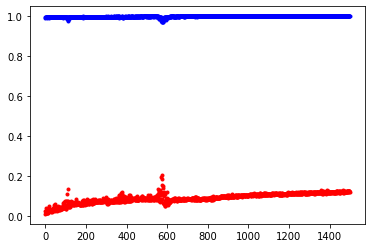

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_21 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [79]:
# 모델컴파일 및 학습
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

history = model.fit(X, Y,  validation_split=0.33, epochs = 1500, batch_size = 500)
# 테스트 셋으로 오차값 저장
y_vloss = history.history['val_loss']
# 학습 셋으로 정확도 저장

y_acc = history.history['accuracy']
print(len(y_vloss))

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c= 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c= 'blue', markersize = 3)
plt.show()
model.summary()

In [67]:
from keras.callbacks import EarlyStopping

# 모델컴파일 및 학습
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

from keras.callbacks import ModelCheckpoint

# 모델 저장 폴더 지정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 방법
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
# 최적화된 모델을 찾기위해 checkpointer을 사용한다. 

# 학습 조기 종료
ealy_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

history = model.fit(X, Y, validation_split=0.33, epochs = 1500, batch_size = 500, callbacks =[checkpointer, ealy_stopping_callback])
model.summary()

Epoch 1/1500
2/2 [==============================] - 1s 159ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0359 - val_accuracy: 0.9845

Epoch 00001: val_loss improved from inf to 0.03593, saving model to ./model\01-0.0359.hdf5
Epoch 2/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0280 - accuracy: 0.9868 - val_loss: 0.0620 - val_accuracy: 0.9752

Epoch 00002: val_loss did not improve from 0.03593
Epoch 3/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0579 - accuracy: 0.9784 - val_loss: 0.0311 - val_accuracy: 0.9876

Epoch 00003: val_loss improved from 0.03593 to 0.03113, saving model to ./model\03-0.0311.hdf5
Epoch 4/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0228 - accuracy: 0.9912 - val_loss: 0.0482 - val_accuracy: 0.9814

Epoch 00004: val_loss did not improve from 0.03113
Epoch 5/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0383 - accuracy: 0.9854 - val_loss: 0.0494 - val_accuracy: 0.9845

E

2/2 [==============================] - 0s 33ms/step - loss: 0.0188 - accuracy: 0.9912 - val_loss: 0.0395 - val_accuracy: 0.9876

Epoch 00043: val_loss did not improve from 0.03113
Epoch 44/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0257 - accuracy: 0.9899 - val_loss: 0.0392 - val_accuracy: 0.9876

Epoch 00044: val_loss did not improve from 0.03113
Epoch 45/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0381 - val_accuracy: 0.9845

Epoch 00045: val_loss did not improve from 0.03113
Epoch 46/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 0.0441 - val_accuracy: 0.9845

Epoch 00046: val_loss did not improve from 0.03113
Epoch 47/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0255 - accuracy: 0.9889 - val_loss: 0.0422 - val_accuracy: 0.9845

Epoch 00047: val_loss did not improve from 0.03113
Epoch 48/1500
2/2 [=========================

2/2 [==============================] - 0s 33ms/step - loss: 0.0176 - accuracy: 0.9946 - val_loss: 0.0408 - val_accuracy: 0.9876

Epoch 00085: val_loss did not improve from 0.03113
Epoch 86/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0413 - val_accuracy: 0.9876

Epoch 00086: val_loss did not improve from 0.03113
Epoch 87/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0451 - val_accuracy: 0.9814

Epoch 00087: val_loss did not improve from 0.03113
Epoch 88/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0201 - accuracy: 0.9922 - val_loss: 0.0461 - val_accuracy: 0.9814

Epoch 00088: val_loss did not improve from 0.03113
Epoch 89/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0199 - accuracy: 0.9905 - val_loss: 0.0414 - val_accuracy: 0.9876

Epoch 00089: val_loss did not improve from 0.03113
Epoch 90/1500
2/2 [=========================

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
history.history['val_loss']

[0.035930145531892776,
 0.061994001269340515,
 0.031127547845244408,
 0.048209261149168015,
 0.04944758862257004,
 0.040604572743177414,
 0.05436186492443085,
 0.05229790136218071,
 0.04198720306158066,
 0.04484173655509949,
 0.04580814391374588,
 0.03852275758981705,
 0.03507543355226517,
 0.035564299672842026,
 0.03456781432032585,
 0.034468527883291245,
 0.034968845546245575,
 0.03542598709464073,
 0.03608710318803787,
 0.03712726756930351,
 0.037336934357881546,
 0.03639326989650726,
 0.03600982204079628,
 0.036635592579841614,
 0.03899778798222542,
 0.03902852162718773,
 0.03763795644044876,
 0.03693448007106781,
 0.036914970725774765,
 0.03745477274060249,
 0.03754095360636711,
 0.03684963658452034,
 0.03707744926214218,
 0.03777243196964264,
 0.03762199729681015,
 0.03625904396176338,
 0.03669668734073639,
 0.03699404373764992,
 0.03731246665120125,
 0.03932957351207733,
 0.042821139097213745,
 0.04076206684112549,
 0.03949946165084839,
 0.039212726056575775,
 0.0380950123071670

In [43]:
len(history.history['val_loss'])

1500

103


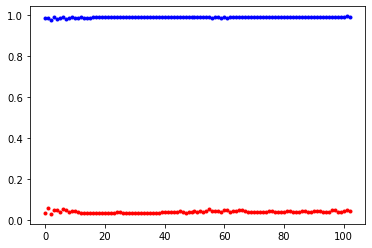

In [68]:
# 테스트 셋으로 오차값 저장
y_vloss = history.history['val_loss']
# 학습 셋으로 정확도 저장

y_acc = history.history['accuracy']
print(len(y_vloss))

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c= 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c= 'blue', markersize = 3)
plt.show()

In [71]:
from keras.models import load_model
# model.save('05-0.1775.hdf5')
model= load_model('./model/05-0.1775.hdf5')
#학습할 데이터 설정
df = pd.read_csv('wine.csv', header = None)
X =df.values[:,0:12]
Y =df.values[:,12]
#평가
print(model.evaluate(X,Y))

204/204 [==============================] - 0s 641us/step - loss: 0.1641 - accuracy: 0.9808
[0.1641276478767395, 0.9807603359222412]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv("wine.csv", header=None)

X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.15, random_state=42)



# 예측평가하기

In [ ]:
predict_1 = model.predict(x_test)

print(predict_1[5], y_test[5])
